### IMPORTING LIBRARIES

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import time


### NSL-KDD Dataset

In [129]:

train_path ="KDDTrain+.txt"
test_path ="KDDTest+.txt"




### Dataset Description: NSL-KDD Dataset

The **NSL-KDD** dataset is an improved version of the original **KDD Cup 1999** dataset, commonly used for evaluating network intrusion detection systems (NIDS). It addresses several shortcomings of the original dataset, such as redundant records and biased learning, and is widely used for machine learning-based intrusion detection tasks.

#### 1. **Dataset Overview**:
- **Origin**: Derived from the KDD Cup 1999 dataset.
- **Structure**: Each record represents a network connection and consists of 41 features, describing different characteristics of the connection (e.g., protocol type, service, and duration), and a label indicating whether the connection is "normal" or part of an attack.
- **Labels**: The dataset contains two main classes: 
  - **Normal**: Represents legitimate, non-malicious traffic.
  - **Attacks**: Several types of attacks, such as:
    - **DoS (Denial of Service)**
    - **Probe (Scanning or reconnaissance)**
    - **R2L (Remote to Local)**
    - **U2R (User to Root)**

#### 2. **Features**:
The dataset has a total of **41 features** plus the **class label**. Some of the key features include:

1. **duration**: Duration of the connection in seconds.
2. **protocol_type**: Type of protocol used (e.g., TCP, UDP, ICMP).
3. **service**: Network service (e.g., HTTP, FTP, SMTP).
4. **src_bytes**: Number of data bytes sent from the source to the destination.
5. **dst_bytes**: Number of data bytes sent from the destination to the source.
6. **flag**: Indicates the status of the connection (e.g., SF for normal).
7. **count**: Number of connections to the same host.
8. **same_srv_rate**: Percentage of connections to the same service.
9. **diff_srv_rate**: Percentage of connections to different services.
10. **srv_count**: Number of connections to the same service from the same source.
11. **land**: Whether the connection is a "land" attack, where source and destination IP addresses are the same.
12. **failed_login**: Number of failed login attempts.
13. **logged_in**: Whether the login was successful (1 if successful, 0 otherwise).
14. **num_compromised**: Number of compromised conditions.
15. **root_shell**: Whether a root shell is granted.
16. **su_attempted**: Whether a "su" (super user) attempt was made.

#### 3. **Data Files**:
The dataset consists of two main files:
- **Training Set (KDDTrain+)**: ~125,973 records
- **Test Set (KDDTest+)**: ~22,544 records

Both datasets contain both "normal" and "attack" labeled instances. The training set is used for model training, while the test set is used for evaluating the performance of the model.



In [130]:
columns = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes',
    'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
    'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
    'num_shells','num_access_files','num_outbound_cmds','is_host_login',
    'is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
    'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate','label','difficulty'
]

In [131]:
train_df = pd.read_csv(train_path, names=columns)
test_df = pd.read_csv(test_path, names=columns)

In [132]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.170,0.030,0.170,0.000,0.000,0.000,0.050,0.000,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21


In [134]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.040,0.060,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.000,0.060,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.610,0.040,0.610,0.020,0.000,0.000,0.000,0.000,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.000,0.000,1.000,0.280,0.000,0.000,0.000,0.000,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.310,0.170,0.030,0.020,0.000,0.000,0.830,0.710,mscan,11


In [135]:
print("Training set duplicates:", train_df.duplicated().sum())
print("Test set duplicates:", test_df.duplicated().sum())

Training set duplicates: 0
Test set duplicates: 0


In [136]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

In [137]:

if 'difficulty' in train_df.columns:
    train_df.drop('difficulty', axis=1, inplace=True)

if 'difficulty' in test_df.columns:
    test_df.drop('difficulty', axis=1, inplace=True)


In [160]:
# Convert attack types to binary: normal = 0, attack = 1
train_df['label'] = train_df['label'].apply(lambda x: 0 if x == 'normal' else 1)
test_df['label'] = test_df['label'].apply(lambda x: 0 if x == 'normal' else 1)

In [161]:
combined_df = pd.concat([train_df, test_df], axis=0)

### label encoding

In [138]:
categorical_cols = ['protocol_type', 'service', 'flag']
encoder = LabelEncoder()

for col in categorical_cols:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])

In [139]:
def binary_label(label):
    return 'normal' if label == 'normal' else 'attack'

train_df['label'] = train_df['label'].apply(binary_label)
test_df['label'] = test_df['label'].apply(binary_label)

In [140]:
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

### standard scaling

In [141]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [142]:
y_train_bin = y_train.map({'normal': 0, 'attack': 1})
y_test_bin = y_test.map({'normal': 0, 'attack': 1})

In [143]:
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)
print("Training labels shape:", y_train_bin.shape)
print("Test labels shape:", y_test_bin.shape)

Training set shape: (125973, 41)
Test set shape: (22544, 41)
Training labels shape: (125973,)
Test labels shape: (22544,)


### Distribution of Labels in Training and Test Sets

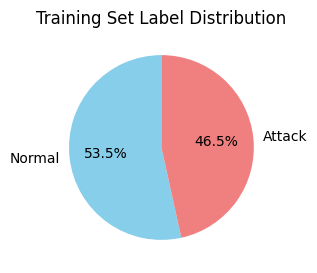

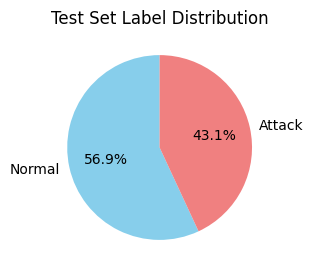

In [144]:

plt.figure(figsize=(3, 3))
train_label_counts = y_train_bin.value_counts()
train_label_counts.plot.pie(autopct='%1.1f%%', labels=['Normal', 'Attack'], colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Training Set Label Distribution')
plt.ylabel('')
plt.show()
plt.figure(figsize=(3, 3))
test_label_counts = y_test_bin.value_counts()
test_label_counts.plot.pie(autopct='%1.1f%%', labels=['Normal', 'Attack'], colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Test Set Label Distribution')
plt.ylabel('')  # Hide ylabel
plt.show()


### Observation

The pie charts above display the distribution of labels (Normal vs. Attack) in both the training and test sets of the NSL-KDD dataset. In the training set, the majority of records correspond to "Normal" traffic, while the "Attack" traffic also constitutes a significant portion. Similarly, the test set shows a similar distribution, with both Normal and Attack traffic represented. The distribution appears fairly balanced, which is crucial for training machine learning models to distinguish between normal network activity and potential intrusions effectively.

### Conclusion

The balanced distribution of labels in both the training and test sets suggests that the dataset is well-prepared for training intrusion detection models. Having a reasonable representation of both normal and attack traffic types ensures that machine learning models, such as Random Forest or XGBoost, can learn to identify patterns corresponding to both classes. A balanced dataset is essential for preventing class bias, which can otherwise degrade the model's ability to detect less frequent attack types.

### Feature Engineering for Intrusion Detection

In [145]:
train_df['duration_per_service'] = train_df['duration'] / (train_df['service'] + 1)
test_df['duration_per_service'] = test_df['duration'] / (test_df['service'] + 1)

# 2. Ratio of source bytes to destination bytes
train_df['src_to_dst_byte_ratio'] = train_df['src_bytes'] / (train_df['dst_bytes'] + 1)
test_df['src_to_dst_byte_ratio'] = test_df['src_bytes'] / (test_df['dst_bytes'] + 1)

# 3. Number of Failed Logins per Logged-in Status (A higher number could indicate suspicious activity)
train_df['failed_logins_per_logged_in'] = train_df['num_failed_logins'] / (train_df['logged_in'] + 1)
test_df['failed_logins_per_logged_in'] = test_df['num_failed_logins'] / (test_df['logged_in'] + 1)


In [146]:
train_df.drop('difficulty', axis=1, inplace=True, errors='ignore')
test_df.drop('difficulty', axis=1, inplace=True, errors='ignore')

In [147]:
print(f"Final Training Data Shape: {X_train_scaled.shape}")
print(f"Final Test Data Shape: {X_test_scaled.shape}")

Final Training Data Shape: (125973, 41)
Final Test Data Shape: (22544, 41)


### Label Distribution in Training Data

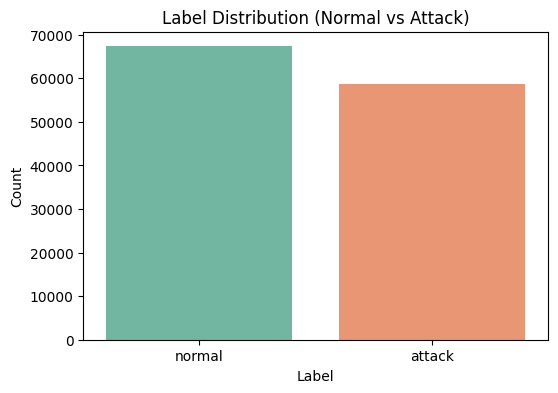

In [148]:
# Plot the label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df, palette='Set2')
plt.title('Label Distribution (Normal vs Attack)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()




#### Observation:
The countplot above displays the distribution of labels in the training dataset, differentiating between 'Normal' and 'Attack' instances. The distribution shows the relative frequencies of each class, providing insights into any potential class imbalance.

#### Conclusion:
From the plot, we can observe whether the dataset is balanced or skewed towards a particular class. If the dataset is imbalanced, further techniques such as oversampling, undersampling, or adjusting class weights may be required to ensure that the model performs well across both classes.

### Label Distribution in Training and Test Data

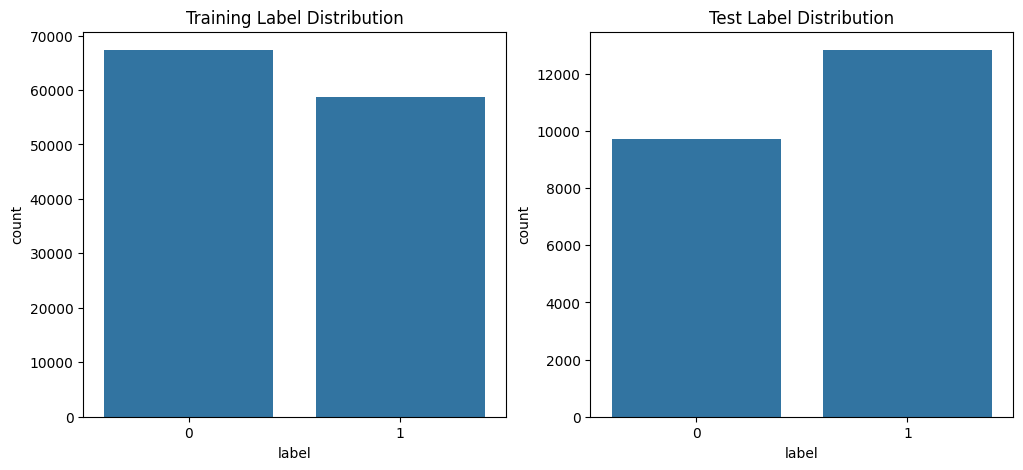

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y_train_bin, ax=ax[0])
ax[0].set_title("Training Label Distribution")
sns.countplot(x=y_test_bin, ax=ax[1])
ax[1].set_title("Test Label Distribution")
plt.show()




#### Observation:
The countplot above shows the distribution of labels in both the training and test datasets. The left plot represents the training data, while the right plot represents the test data. This allows us to compare how the distribution of labels (Normal vs Attack) varies across both datasets.

#### Conclusion:
By examining the plots, we can identify if there is any class imbalance in both the training and test sets. A significant difference between the two datasets might indicate the need for adjustments in data preprocessing to ensure that both sets represent a balanced distribution of classes for model training and evaluation.

### Protocol Type Distribution in Training Set


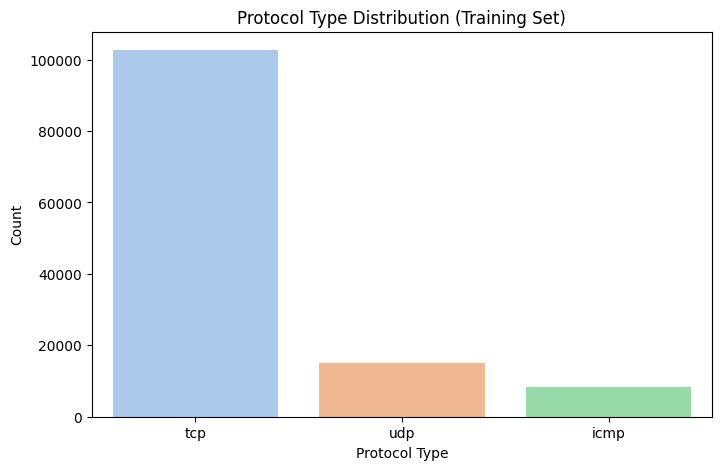

In [150]:

raw_train_df = pd.read_csv("KDDTrain+.txt", names=columns)
plt.figure(figsize=(8, 5))
sns.countplot(data=raw_train_df, x='protocol_type', order=raw_train_df['protocol_type'].value_counts().index, palette='pastel')
plt.title('Protocol Type Distribution (Training Set)')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.show()



#### Observation:
The countplot above visualizes the distribution of different protocol types in the training dataset. The `protocol_type` feature represents the type of network protocol used in each network connection, and the plot shows how frequently each protocol appears in the training data.

#### Conclusion:
By examining this distribution, we can gain insights into which protocol types are most prevalent in the training dataset. Understanding this distribution is important because certain protocol types might be more indicative of specific attack behaviors or network anomalies. This can help guide feature engineering and model selection for improved performance in intrusion detection.

### Top 10 Services in Training Set

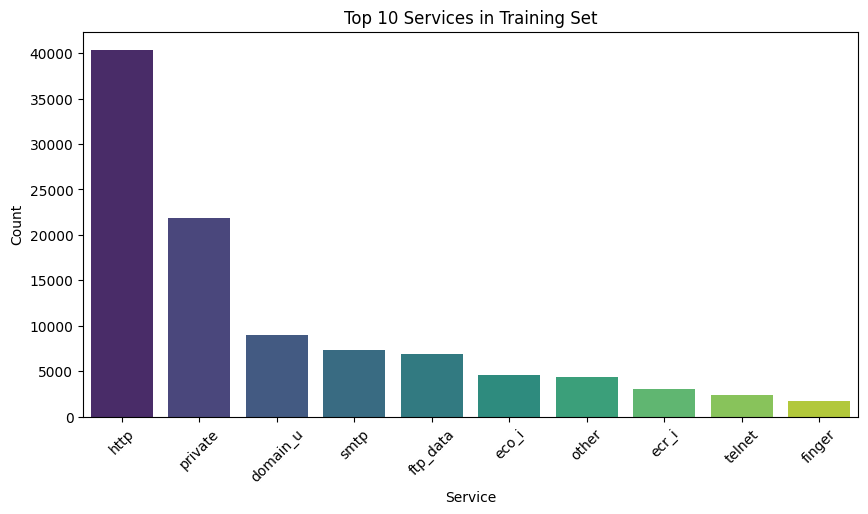

In [151]:

raw_train_df = pd.read_csv("KDDTrain+.txt", names=columns)
top_services = raw_train_df['service'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_services.index, y=top_services.values, palette='viridis')
plt.title('Top 10 Services in Training Set')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Service')
plt.show()




#### Observation:
The bar plot above shows the distribution of the top 10 most frequent services in the training dataset. The `service` feature represents the type of service associated with each network connection. This plot highlights which services are most commonly used in the training set, with the x-axis representing the service type and the y-axis indicating the count of occurrences.

#### Conclusion:
From the plot, we can infer which services are more prevalent in the training data, providing insight into network behavior and potential attack vectors. Services with higher counts could represent typical network traffic, while lower-count services may be indicative of less common or more specialized traffic types. Understanding this distribution can help with feature selection and assist in detecting anomalies based on service-related characteristics.

### Correlation Heatmap of Top Correlated Features

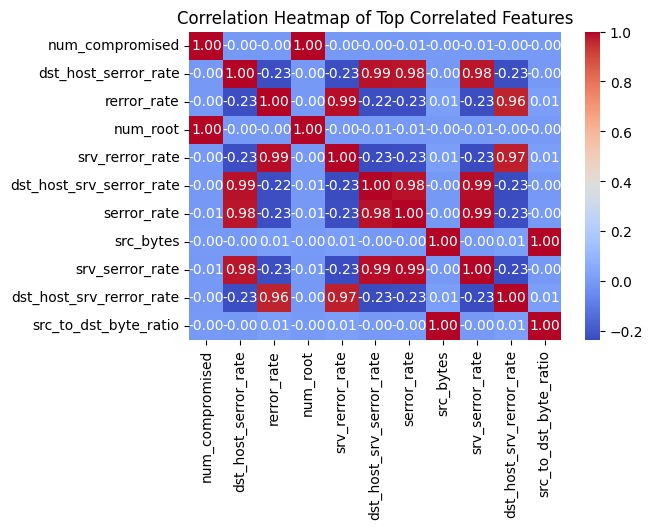

In [153]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = train_df.select_dtypes(include=np.number)

correlation_matrix = numeric_cols.corr().abs()
top_corr = correlation_matrix.unstack().sort_values(ascending=False)

top_corr = top_corr[(top_corr < 1)].drop_duplicates()
top_feature_pairs = top_corr[:10].index
top_features = list(set([pair[0] for pair in top_feature_pairs] + [pair[1] for pair in top_feature_pairs]))
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_cols[top_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Top Correlated Features')
plt.show()




#### Observation:
The heatmap above visualizes the correlation between the top 10 most correlated features in the training dataset. The colors represent the strength and direction of the correlation between features, where darker colors indicate stronger correlations. Positive correlations are shown in warmer colors (e.g., red), while negative correlations are shown in cooler colors (e.g., blue). The numbers on the heatmap represent the correlation values between pairs of features.

#### Conclusion:
This heatmap provides valuable insights into the relationships between different features in the dataset. Highly correlated features may be redundant and can be considered for feature selection to improve model performance and reduce overfitting. Conversely, features with low correlation can provide independent information, which can be useful for the model to differentiate between different classes (normal vs attack).

In [154]:

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


### Model Evaluation for Intrusion Detection

In [155]:

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}
for name, model in models.items():
    print(f"\nTraining {name}")
    start_time = time.time()
    model.fit(X_train, y_train_encoded)
    end_time = time.time()
    print(f"Training time: {end_time - start_time:.2f} seconds")
    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test_encoded, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_encoded, y_pred))



Training Random Forest
Training time: 18.79 seconds
Accuracy: 0.7727
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.62      0.76     12833
           1       0.66      0.97      0.79      9711

    accuracy                           0.77     22544
   macro avg       0.81      0.80      0.77     22544
weighted avg       0.83      0.77      0.77     22544

Confusion Matrix:
[[7987 4846]
 [ 279 9432]]

Training XGBoost
Training time: 2.07 seconds
Accuracy: 0.8040
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     12833
           1       0.70      0.97      0.81      9711

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.85      0.80      0.80     22544

Confusion Matrix:
[[8701 4132]
 [ 286 9425]]


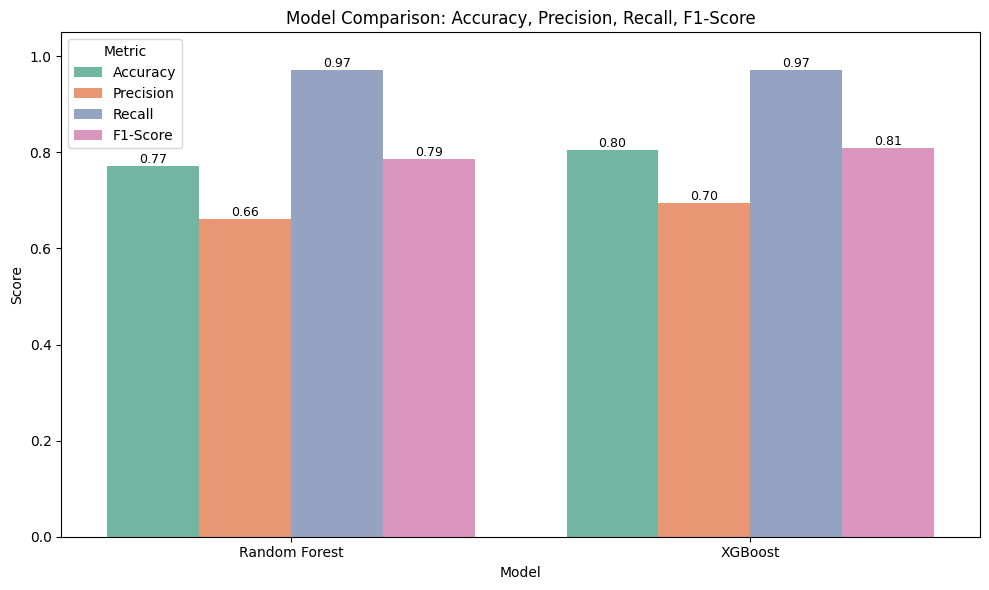

In [158]:
model_names = []
scores = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}
for name, model in models.items():
    y_pred = model.predict(X_test)

    report = classification_report(y_test_encoded, y_pred, output_dict=True)
    model_names.append(name)

    scores["Accuracy"].append(accuracy_score(y_test_encoded, y_pred))
    scores["Precision"].append(report["1"]["precision"])
    scores["Recall"].append(report["1"]["recall"])
    scores["F1-Score"].append(report["1"]["f1-score"])
df_scores = pd.DataFrame(scores, index=model_names).reset_index().melt(
    id_vars='index', var_name='Metric', value_name='Score'
).rename(columns={'index': 'Model'})
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_scores, x='Model', y='Score', hue='Metric', palette='Set2')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)

plt.title('Model Comparison: Accuracy, Precision, Recall, F1-Score')
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()




#### Observation:
In the above code, performance metrics (Accuracy, Precision, Recall, and F1-Score) for each machine learning model (Random Forest and XGBoost) are calculated and compared. The results are displayed using a bar plot, where each model's scores across these four metrics are visualized:
- **Accuracy**: The proportion of correctly predicted instances out of all predictions.
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
- **Recall**: The ratio of correctly predicted positive observations to the total actual positives.
- **F1-Score**: The weighted average of Precision and Recall, providing a balance between them.

Each bar represents one of these metrics for the models, with the precise value shown at the edge of the bars for clarity.

#### Conclusion:
This comparison helps evaluate the trade-offs between different models and their ability to detect network intrusions. It is crucial to look at all four metrics, as a model with high accuracy might not always be the best if its precision or recall is low. The visualization provides a clear overview of how well each model performs across different evaluation criteria, which is critical for selecting the most effective model for deployment in a real-time Intrusion Detection System (NIDS).

In [174]:
def real_time_detection(input_data, model, scaler):
    for i, row in enumerate(input_data):
        time.sleep(0.1)  # Simulate stream
        row_scaled = scaler.transform([row])
        prediction = model.predict(row_scaled)[0]
        status = "Suspicious" if prediction == 1 else "Normal"
        print(f"[Packet {i+1}] Prediction: {status}")

# Simulate with first 10 packets
real_time_detection(X_test.values[:10], model, scaler)


[Packet 1] Prediction: Normal
[Packet 2] Prediction: Normal
[Packet 3] Prediction: Normal
[Packet 4] Prediction: Normal
[Packet 5] Prediction: Normal
[Packet 6] Prediction: Normal
[Packet 7] Prediction: Normal
[Packet 8] Prediction: Normal
[Packet 9] Prediction: Normal
[Packet 10] Prediction: Normal
